In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [3]:
!ls

EDA.ipynb                 primer_batch.csv          sample_1000.csv
baseline.ipynb            primer_posilki.csv        transactions.csv
canc_df.csv               promo_df.csv              wholesale_trade_table.csv
feedback.csv              request_results.ipynb
lgb.ipynb                 sales_plan.csv


In [4]:
df_transactions = pd.read_csv('transactions.csv')
df_transactions['dates'] = pd.to_datetime(df_transactions['dates'])
df_transactions.tail()

,dates,SKU,user,price
1334255,2019-04-21,16663,20223,2240.0
1334256,2019-04-21,16663,25555,2240.0
1334257,2019-04-21,16663,47340,2240.0
1334258,2019-04-21,16663,23762,2240.0
1334259,2019-04-21,16663,48007,2240.0


In [5]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334260 entries, 0 to 1334259
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   dates   1334260 non-null  datetime64[ns]
 1   SKU     1334260 non-null  int64         
 2   user    1334260 non-null  int64         
 3   price   1334260 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 40.7 MB


/Applications/anaconda3/envs/hard_ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


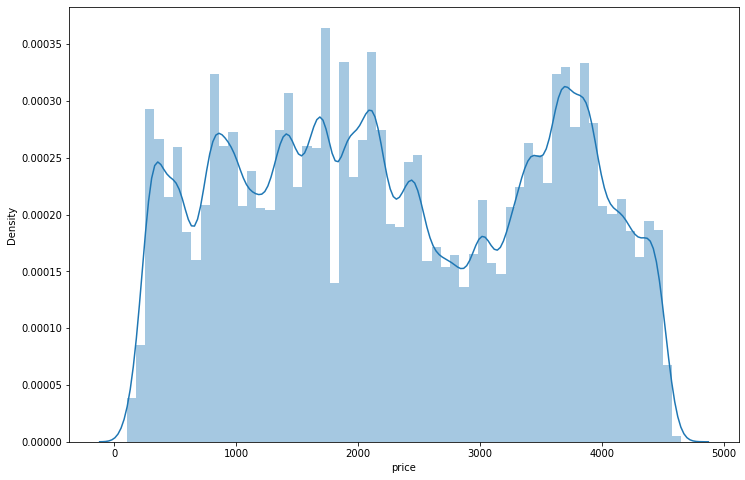

In [6]:
plt.figure(figsize=(12, 8))
sns.distplot(df_transactions.price.values, bins=60, kde=True)
plt.xlabel('price')
plt.show()

In [7]:
df_sample_1000 = pd.read_csv('sample_1000.csv')
df_sample_1000.tail()

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
995,76988,UA,UA1,UA100,UA10000,UH2WWF,484JDFU5,2018-03-08,2019-08-10 00:00:00
996,30482,UA,UA1,UA100,UA10006,4HJSP5,8QJHUA65,2019-03-19,2200-01-01 00:00:00
997,85915,BJ,BJ1,BJ102,BJ10201,AO59EQ,VMB2NPY2,2018-03-02,2019-07-05 00:00:00
998,39544,G9,G91,G9101,G910107,B4TA32,79VL731U,2019-05-11,2200-01-01 00:00:00
999,16019,AQ,AQ1,AQ100,AQ10000,AO59EQ,8FYENEWM,2018-11-09,2200-01-01 00:00:00


In [8]:
df_promo = pd.read_csv('promo_df.csv')
df_promo.tail()

,SKU,week_num,year,discount
2337,35645,52,2019,0.15
2338,81314,52,2019,0.05
2339,75661,52,2019,0.05
2340,38664,52,2019,0.05
2341,47952,52,2019,0.10


In [9]:
df_promo.groupby('discount')['discount'].agg(['count'])

,count
discount,
0.05,988
0.10,699
0.15,436
0.20,219


In [10]:
df_canc = pd.read_csv('canc_df.csv')
df_canc.tail()

,year,week_num,SKU,ret_net_1_price,ret_net_2_price,ret_net_3_price
10319,2019,52,97659,3409.219608,3394.456244,3434.336572
10320,2019,52,98346,1632.598644,1710.327024,1638.673052
10321,2019,52,98642,1498.441016,1520.235649,1481.583880
10322,2019,52,98774,1649.812737,1638.274072,1725.167364
10323,2019,52,99974,3369.132504,3343.880679,3370.393064


In [11]:
df_sales_plan = pd.read_csv('sales_plan.csv')
df_sales_plan.tail()

,SKU,year,month,plan,back_bonus
12207,99996,2019,8,190.0,140000
12208,99996,2019,9,150.0,100000
12209,99996,2019,10,150.0,200000
12210,99996,2019,11,150.0,100000
12211,99996,2019,12,150.0,100000


In [12]:
df_wholesale_trade_table = pd.read_csv('wholesale_trade_table.csv')
df_wholesale_trade_table.tail()

,SKU,year,week_num,month,cost_price
61247,99996,2019,48,12,719.0
61248,99996,2019,49,12,680.0
61249,99996,2019,50,12,697.0
61250,99996,2019,51,12,691.0
61251,99996,2019,52,12,692.0


In [13]:
len(df_wholesale_trade_table.SKU.unique())

1000

In [14]:
df_wholesale_trade_table.year.unique()

array([2019, 2018])

# Data preparation

In [15]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334260 entries, 0 to 1334259
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   dates   1334260 non-null  datetime64[ns]
 1   SKU     1334260 non-null  int64         
 2   user    1334260 non-null  int64         
 3   price   1334260 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 40.7 MB


In [16]:
# # Please use Series.dt.isocalendar().week instead.
# df_transactions['week_of_year'] = df_transactions.dates.dt.isocalendar().week
# df_transactions

In [17]:
df_transactions['year'] = df_transactions.dates.dt.year
df_transactions['month'] = df_transactions.dates.dt.month
df_transactions['week_num'] = df_transactions.dates.dt.isocalendar().week
df_transactions.head()

,dates,SKU,user,price,year,month,week_num
0,2018-11-09,16019,44796,1252.0,2018,11,45
1,2018-11-09,16019,44510,1252.0,2018,11,45
2,2018-11-09,16019,19074,1252.0,2018,11,45
3,2018-11-09,16019,34472,1252.0,2018,11,45
4,2018-11-10,16019,48407,1252.0,2018,11,45


In [18]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334260 entries, 0 to 1334259
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   dates     1334260 non-null  datetime64[ns]
 1   SKU       1334260 non-null  int64         
 2   user      1334260 non-null  int64         
 3   price     1334260 non-null  float64       
 4   year      1334260 non-null  int64         
 5   month     1334260 non-null  int64         
 6   week_num  1334260 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(4)
memory usage: 67.4 MB


In [50]:
df_price_cost = pd.merge(df_transactions, df_wholesale_trade_table,
                         how='left', on=['SKU', 'year',
                                         'month', 'week_num'])

df_price_cost['year'] = df_price_cost.dates.dt.year
df_price_cost['month'] = df_price_cost.dates.dt.month
df_price_cost['quarter_of_year'] = df_price_cost.dates.dt.quarter
df_price_cost['week_of_year'] = df_price_cost.dates.dt.weekofyear
df_price_cost['day_of_year'] = df_price_cost.dates.dt.dayofyear
df_price_cost['day_of_month'] = df_price_cost.dates.dt.day
df_price_cost['day_of_week'] = df_price_cost.dates.dt.dayofweek
df_price_cost["is_wknd"] = df_price_cost.dates.dt.weekday // 4
df_price_cost['is_month_start'] = df_price_cost.dates.dt.is_month_start.astype(int)
df_price_cost['is_month_end'] = df_price_cost.dates.dt.is_month_end.astype(int)
df_price_cost = df_price_cost.drop(columns=['dates'])

df_price_cost.head()

/var/folders/1r/5bqyy5gj7hz6ppb28lbc6ms80000gn/T/ipykernel_20299/87817472.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_price_cost['week_of_year'] = df_price_cost.dates.dt.weekofyear


,SKU,user,price,year,month,week_num,cost_price,quarter_of_year,week_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
0,16019,44796,1252.0,2018,11,45,1070.0,4,45,313,9,4,1,0,0
1,16019,44510,1252.0,2018,11,45,1070.0,4,45,313,9,4,1,0,0
2,16019,19074,1252.0,2018,11,45,1070.0,4,45,313,9,4,1,0,0
3,16019,34472,1252.0,2018,11,45,1070.0,4,45,313,9,4,1,0,0
4,16019,48407,1252.0,2018,11,45,1070.0,4,45,314,10,5,1,0,0


In [51]:
# df_price_cost['price/cost'].min()

In [52]:
# df_price_cost['price/cost'].max()

In [53]:
df_price_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334260 entries, 0 to 1334259
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   SKU              1334260 non-null  int64  
 1   user             1334260 non-null  int64  
 2   price            1334260 non-null  float64
 3   year             1334260 non-null  int64  
 4   month            1334260 non-null  int64  
 5   week_num         1334260 non-null  int64  
 6   cost_price       1334260 non-null  float64
 7   quarter_of_year  1334260 non-null  int64  
 8   week_of_year     1334260 non-null  int64  
 9   day_of_year      1334260 non-null  int64  
 10  day_of_month     1334260 non-null  int64  
 11  day_of_week      1334260 non-null  int64  
 12  is_wknd          1334260 non-null  int64  
 13  is_month_start   1334260 non-null  int64  
 14  is_month_end     1334260 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 162.9 MB


In [54]:
df_primer_batch = pd.read_csv('primer_batch.csv')

df_primer_batch['dates'] = pd.to_datetime(df_primer_batch['dates'])


df_primer_batch['year'] = df_primer_batch.dates.dt.year
df_primer_batch['month'] = df_primer_batch.dates.dt.month
df_primer_batch['week_num'] = df_primer_batch.dates.dt.weekofyear

df_primer_batch = pd.merge(df_primer_batch, df_wholesale_trade_table,
                         how='left', on=['SKU', 'year',
                                         'month', 'week_num'])

df_primer_batch['year'] = df_primer_batch.dates.dt.year
df_primer_batch['month'] = df_primer_batch.dates.dt.month
df_primer_batch['quarter_of_year'] = df_primer_batch.dates.dt.quarter
df_primer_batch['week_of_year'] = df_primer_batch.dates.dt.weekofyear
df_primer_batch['day_of_year'] = df_primer_batch.dates.dt.dayofyear
df_primer_batch['day_of_month'] = df_primer_batch.dates.dt.day
df_primer_batch['day_of_week'] = df_primer_batch.dates.dt.dayofweek
df_primer_batch["is_wknd"] = df_primer_batch.dates.dt.weekday // 4
df_primer_batch['is_month_start'] = df_primer_batch.dates.dt.is_month_start.astype(int)
df_primer_batch['is_month_end'] = df_primer_batch.dates.dt.is_month_end.astype(int)
df_primer_batch = df_primer_batch.drop(columns=['dates'])

df_primer_batch.head()

/var/folders/1r/5bqyy5gj7hz6ppb28lbc6ms80000gn/T/ipykernel_20299/4243206853.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_primer_batch['week_num'] = df_primer_batch.dates.dt.weekofyear
/var/folders/1r/5bqyy5gj7hz6ppb28lbc6ms80000gn/T/ipykernel_20299/4243206853.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_primer_batch['week_of_year'] = df_primer_batch.dates.dt.weekofyear


,SKU,user_id,year,month,week_num,cost_price,quarter_of_year,week_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
0,31656,22427,2019,12,48,1185.0,4,48,335,1,6,1,1,0
1,29946,47017,2019,12,48,1363.0,4,48,335,1,6,1,1,0
2,24848,30437,2019,12,48,1456.0,4,48,335,1,6,1,1,0
3,59524,41824,2019,12,48,3235.0,4,48,335,1,6,1,1,0
4,98346,26591,2019,12,48,1457.0,4,48,335,1,6,1,1,0


In [55]:
df_price_cost.head(2)

,SKU,user,price,year,month,week_num,cost_price,quarter_of_year,week_of_year,day_of_year,day_of_month,day_of_week,is_wknd,is_month_start,is_month_end
0,16019,44796,1252.0,2018,11,45,1070.0,4,45,313,9,4,1,0,0
1,16019,44510,1252.0,2018,11,45,1070.0,4,45,313,9,4,1,0,0


In [62]:
def date_to_datetime(df):
    df['year'] = df.dates.dt.year
    df['month'] = df.dates.dt.month
    df['quarter_of_year'] = df.dates.dt.quarter
    df['week_of_year'] = df.dates.dt.weekofyear
    df['day_of_year'] = df.dates.dt.dayofyear
    df['day_of_month'] = df.dates.dt.day
    df['day_of_week'] = df.dates.dt.dayofweek
    df["is_wknd"] = df.dates.dt.weekday // 4
    df['is_month_start'] = df.dates.dt.is_month_start.astype(int)
    df['is_month_end'] = df.dates.dt.is_month_end.astype(int)
    df = df.drop(columns=['dates'])
    
    return df